<a href="https://colab.research.google.com/github/damarismuli/Implementating-kNN-classifier-and-a-Naive-Bayes-classifier/blob/main/K_nearest_neighbor_kNN_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Defining the Question

a) Specifying the Data Analytic Question

Implementing  a K-nearest neighbor (kNN) classifier on train dataset so as to Predict sex based on the passenger's personal information.Then calculate the f1 Score and accuracy of the model.


b) Defining the Metric for Success


To determine the  model that will results to most accurate prediction for passenger's sex.


c) Understanding the context

The k-nearest neighbors (KNN) algorithm is a simple, non-parametric supervised machine learning algorithm used for both regression and classification. KNN tries to predict the correct class for the test data by calculating the distance between the test data and all the training points. Then select the K number of points which is closet to the test data.

d) Recording the Experimental Design

In this project ,i imported the necessary libraries,loaded and explored datasets,Cleaned and verified data, performed Exploratory Data Analysis;Univariate, Bivariate and Multivariate Analysis to check on one variable, relationships and differences between different independent variables and the coorelation of the variables respectively.Used train set to create train and test data.Implemented the K-nearest neighbor (kNN) classifier.Did permance evalution,cross validation,applied optimization techniques  and finally gave conclusion recommendations.

e) Data Relevance

The data provided was relevant to building a model that implement a K-nearest neighbor (kNN) classifier:https://archive.org/download/train5_202002/train%20%285%29.csv


2.Reading the Data

In [1]:
#Importing Our Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the Data from the source i.e. csv
# ---
# Dataset source = https://archive.org/download/train5_202002/train%20%285%29.csv
# ---
#

#Loading directly from url
train_df = 'https://archive.org/download/train5_202002/train%20%285%29.csv'
train_df = pd.read_csv(train_df)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


3. Checking the Data

In [3]:
# Determining the no. of records in the train dataset
#
train_df.shape

(891, 12)

In [4]:
# previewing the number of columns in the train dataset
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#Previewing the top 5 rows of our dataset
#
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Previewing the last 5 rows of our dataset
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# Checking whether each column has an appropriate datatype 
#
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# checking the information about our dataset
#
train_df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [9]:
# understanding our dataset
#
train_df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

4. Data cleaning

In [10]:
# Identifying the Missing Data on our dataset
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#Dealing with missing values
df = train_df.dropna()
print(df)

     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ... 

In [12]:
#Let's preview df to check changes
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
#checking for duplicates in our dataset
train_df.duplicated().sum()

0

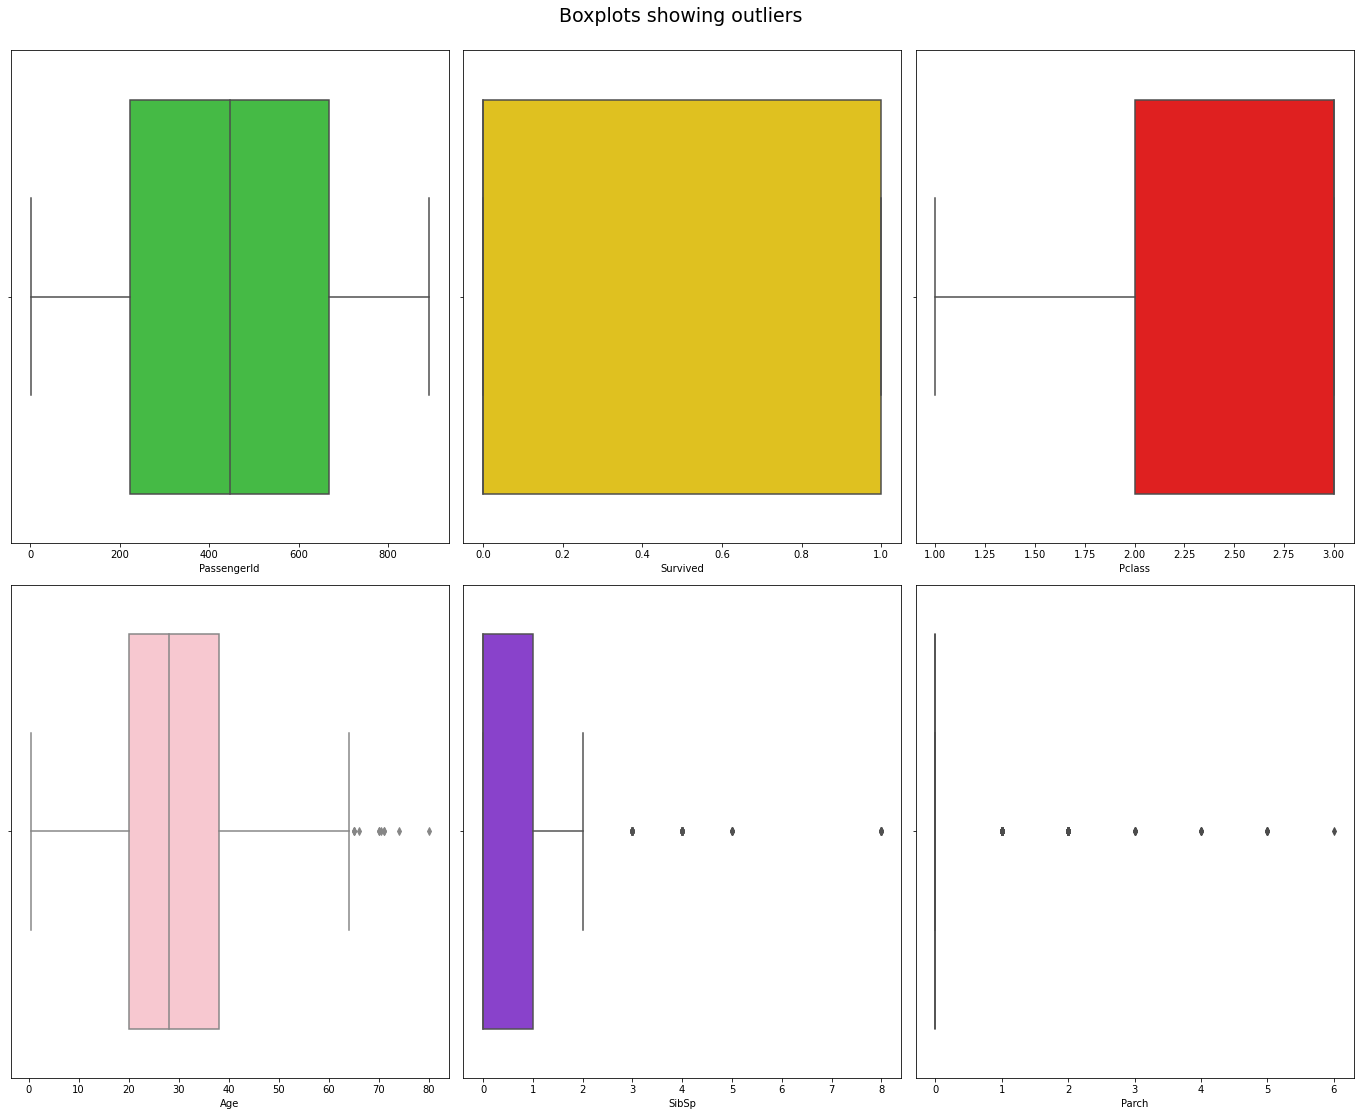

In [14]:
# checking for outliers
fig, axes = plt.subplots(nrows =2, ncols = 3, figsize = (19, 15))
colors = ['limegreen', 'gold', 'red', 'pink', 'blueviolet','darkorange','springgreen']
columns = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']
plt.suptitle('Boxplots showing outliers', y = 1.03, fontsize = 19)
for ax, data, column , color in zip(axes.flatten(), train_df, columns, colors):
    sns.boxplot(train_df[column], ax = ax, color = color)
plt.tight_layout()


We'll will not take any action to deal with outliers since they contain necessary values for our prediction.

5.Exploratory Data Analysis

Univalent Analysis

In [15]:
#Summary statistics

df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,183.000000,183.000000,183.000000,183,183,183.000000,183.000000,183.000000,183,183.000000,183,183
unique,NaN,NaN,NaN,183,2,NaN,NaN,NaN,127,NaN,133,3
top,NaN,NaN,NaN,"Cumings, Mrs. John Bradley (Florence Briggs Th...",male,NaN,NaN,NaN,113760,NaN,G6,S
freq,NaN,NaN,NaN,1,95,NaN,NaN,NaN,4,NaN,4,116
mean,455.366120,0.672131,1.191257,NaN,NaN,35.674426,0.464481,0.475410,NaN,78.682469,NaN,NaN
std,247.052476,0.470725,0.515187,NaN,NaN,15.643866,0.644159,0.754617,NaN,76.347843,NaN,NaN
min,2.000000,0.000000,1.000000,NaN,NaN,0.920000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,263.500000,0.000000,1.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,29.700000,NaN,NaN
50%,457.000000,1.000000,1.000000,NaN,NaN,36.000000,0.000000,0.000000,NaN,57.000000,NaN,NaN
75%,676.000000,1.000000,1.000000,NaN,NaN,47.500000,1.000000,1.000000,NaN,90.000000,NaN,NaN


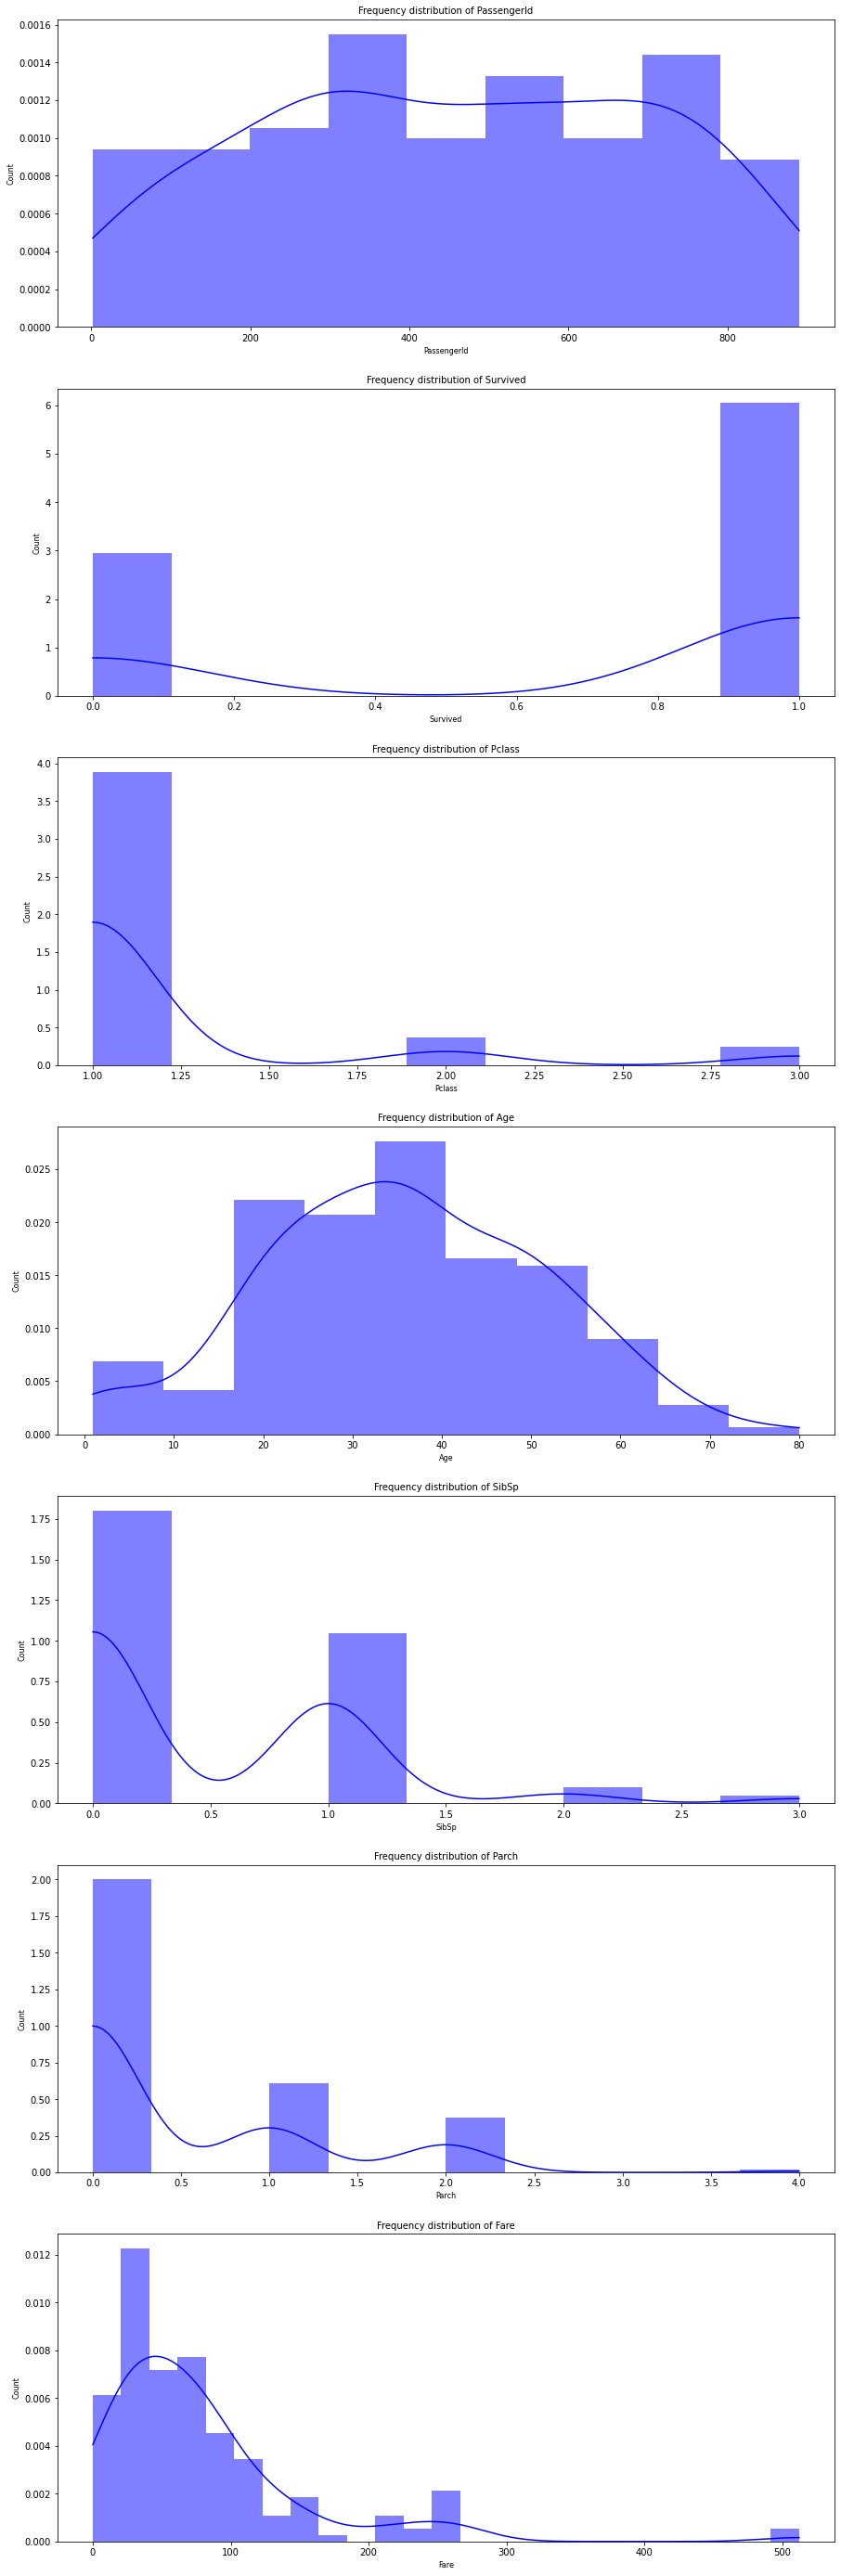

In [16]:
#Checking data distribution using histogram
# distribution of numerical variables.
col_names = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']
fig, ax = plt.subplots(len(col_names), figsize=(15,50))

for i, col_val in enumerate(col_names):

    
    sns.histplot(df[col_val], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    

plt.show()

b) Bivalent Analysis

In [17]:
#Summary statistics

df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,183.000000,183.000000,183.000000,183,183,183.000000,183.000000,183.000000,183,183.000000,183,183
unique,NaN,NaN,NaN,183,2,NaN,NaN,NaN,127,NaN,133,3
top,NaN,NaN,NaN,"Cumings, Mrs. John Bradley (Florence Briggs Th...",male,NaN,NaN,NaN,113760,NaN,G6,S
freq,NaN,NaN,NaN,1,95,NaN,NaN,NaN,4,NaN,4,116
mean,455.366120,0.672131,1.191257,NaN,NaN,35.674426,0.464481,0.475410,NaN,78.682469,NaN,NaN
std,247.052476,0.470725,0.515187,NaN,NaN,15.643866,0.644159,0.754617,NaN,76.347843,NaN,NaN
min,2.000000,0.000000,1.000000,NaN,NaN,0.920000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,263.500000,0.000000,1.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,29.700000,NaN,NaN
50%,457.000000,1.000000,1.000000,NaN,NaN,36.000000,0.000000,0.000000,NaN,57.000000,NaN,NaN
75%,676.000000,1.000000,1.000000,NaN,NaN,47.500000,1.000000,1.000000,NaN,90.000000,NaN,NaN


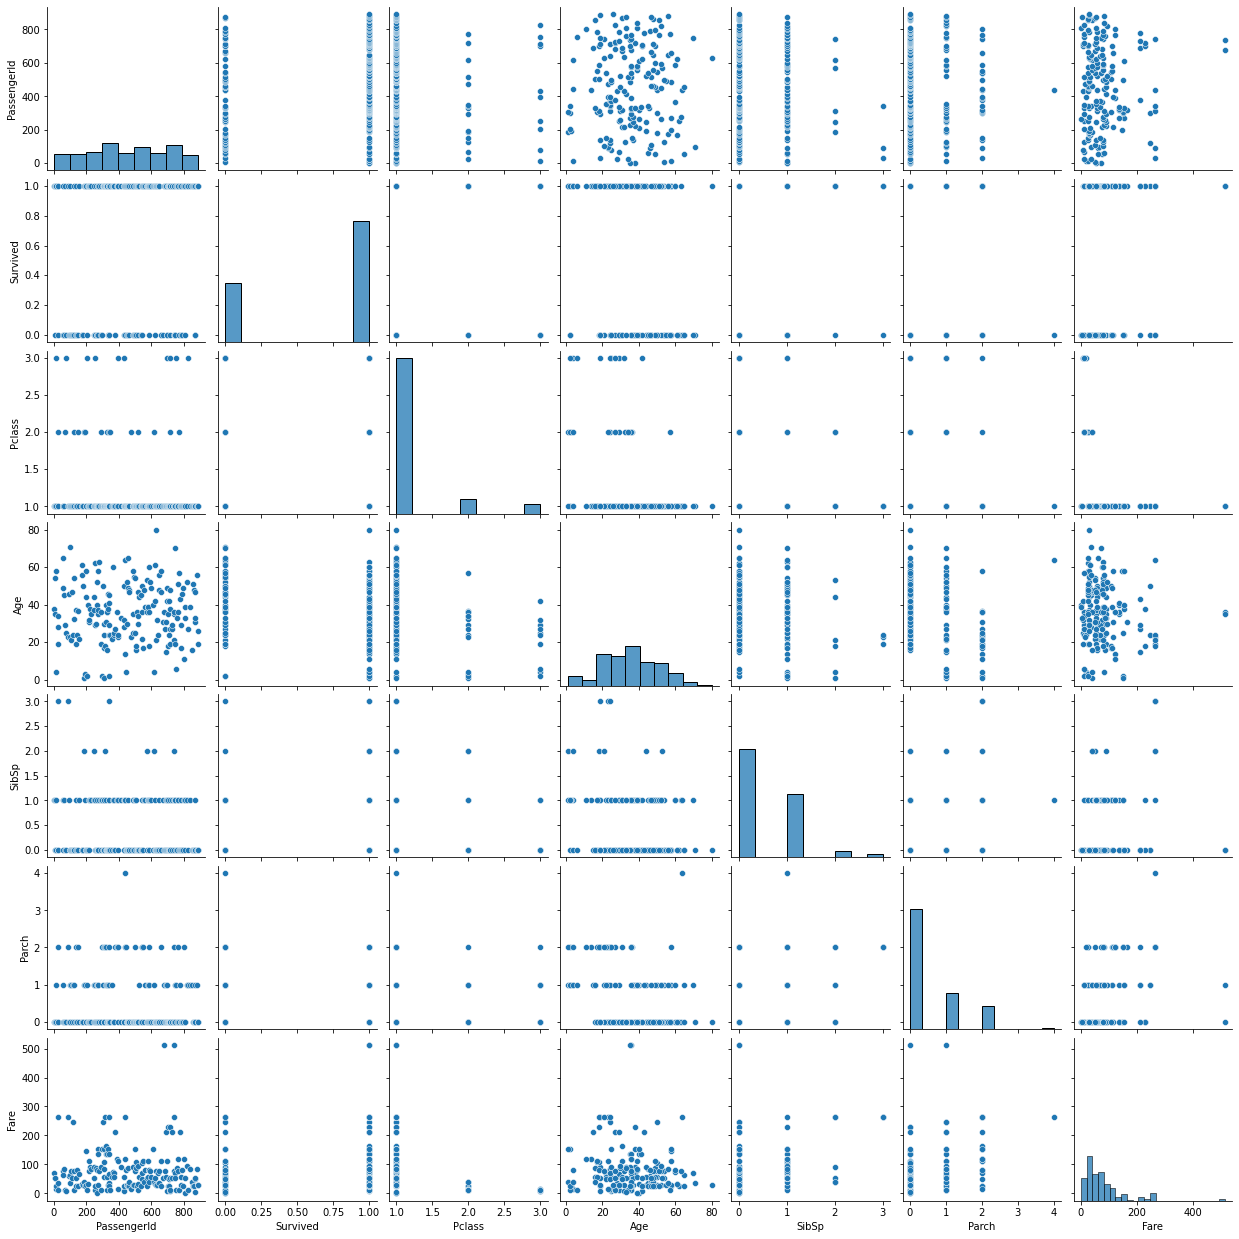

In [18]:
# Ploting the bivariate summaries and recording our observations
# scatterplot
sns.pairplot(df)
plt.show()

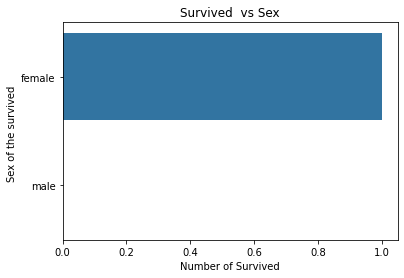

In [19]:
# Visualization of survived versus sex

ax = sns.barplot(x = 'Survived', y = 'Sex', data=df, ci=None, estimator=np.median)
ax.set(xlabel='Number of Survived',
       ylabel='Sex of the survived ',
       title='Survived  vs Sex')
plt.show()

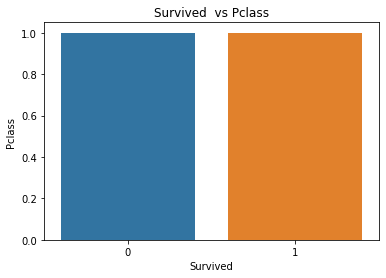

In [20]:
# Visualization of survived versus Pclass

ax = sns.barplot(x = 'Survived', y = 'Pclass', data=df, ci=None, estimator=np.median)
ax.set(xlabel='Survived',
       ylabel='Pclass ',
       title='Survived  vs Pclass')
plt.show()

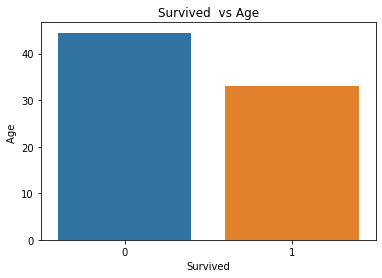

In [21]:
# Visualization of survived versus Age

ax = sns.barplot(x = 'Survived', y = 'Age', data=df, ci=None, estimator=np.median)
ax.set(xlabel='Survived',
       ylabel='Age ',
       title='Survived  vs Age')
plt.show()

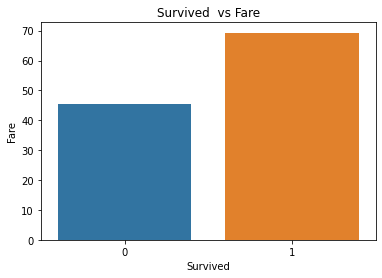

In [22]:
# Visualization of survived versus Parch

ax = sns.barplot(x = 'Survived', y = 'Fare', data=df, ci=None, estimator=np.median)
ax.set(xlabel='Survived',
       ylabel='Fare',
       title='Survived  vs Fare')
plt.show()

Text(0.5, 1.0, 'Survived Vs SibSp')

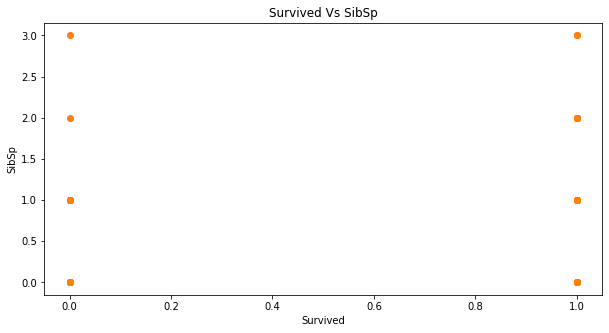

In [23]:
#scatterplot to visualize price versus SibSp
x= df['SibSp']
y=df['Survived']

plt.subplots(figsize = (10,5))
sns.scatterplot(y, x);
plt.scatter(df.Survived, df.SibSp)
plt.title('Survived Vs SibSp')

Text(0.5, 1.0, 'Survived Parch')

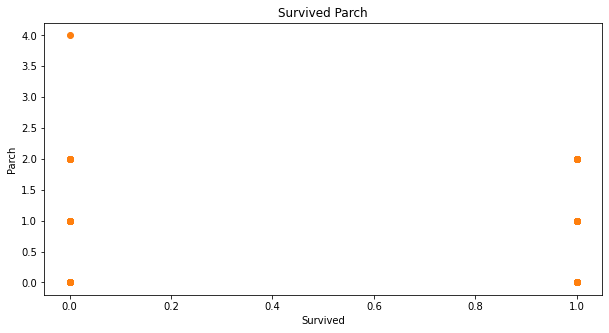

In [24]:
#scatterplot to visualize Survived versus Parch
x= df['Parch']
y=df['Survived']

plt.subplots(figsize = (10,5))
sns.scatterplot(y, x);
plt.scatter(df.Survived, df.Parch)
plt.title('Survived Parch')

In [25]:
# correlation between variables
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.148495,-0.089136,0.030933,-0.083488,-0.051454,0.029740
Survived,0.148495,1.000000,-0.034542,-0.254085,0.106346,0.023582,0.134241
Pclass,-0.089136,-0.034542,1.000000,-0.306514,-0.103592,0.047496,-0.315235
Age,0.030933,-0.254085,-0.306514,1.000000,-0.156162,-0.271271,-0.092424
SibSp,-0.083488,0.106346,-0.103592,-0.156162,1.000000,0.255346,0.286433
Parch,-0.051454,0.023582,0.047496,-0.271271,0.255346,1.000000,0.389740
Fare,0.029740,0.134241,-0.315235,-0.092424,0.286433,0.389740,1.000000


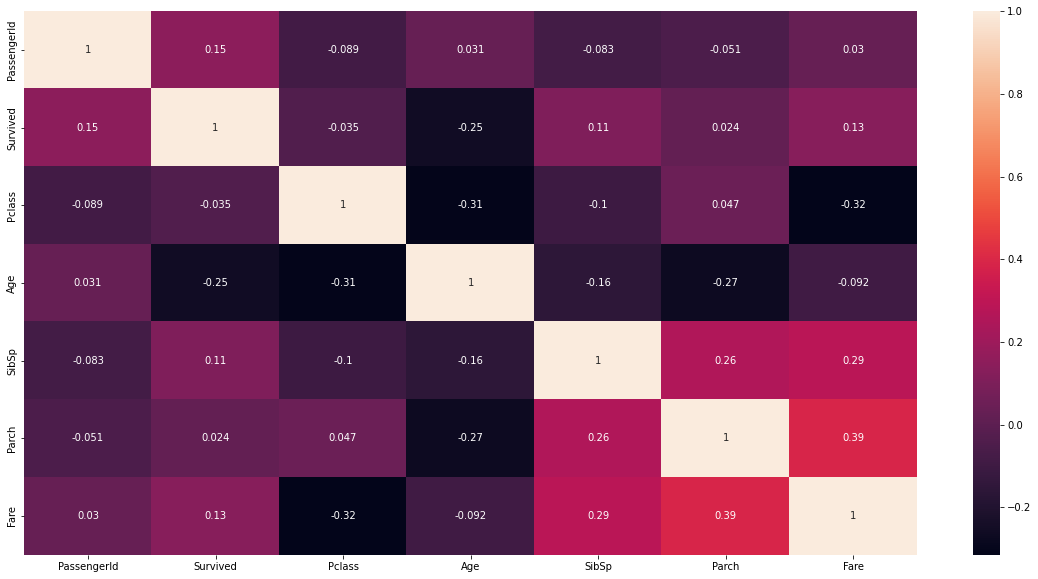

In [26]:
# Heatmap for correlation
plt.figure(figsize=(20, 10))
corr = df.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);

Multivalent Analysis



In [27]:
# Let's Perform adequacy tests
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value
# In Bartlett ’s test, the p-value is 2.690572266677326e-07. The test was statistically significant, 
#Accept Null Hypothesis

(135.6273650326359, 2.690572266677326e-07)

6. Implementing the Solution

In [28]:
#Summary statistics

df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,183.000000,183.000000,183.000000,183,183,183.000000,183.000000,183.000000,183,183.000000,183,183
unique,NaN,NaN,NaN,183,2,NaN,NaN,NaN,127,NaN,133,3
top,NaN,NaN,NaN,"Cumings, Mrs. John Bradley (Florence Briggs Th...",male,NaN,NaN,NaN,113760,NaN,G6,S
freq,NaN,NaN,NaN,1,95,NaN,NaN,NaN,4,NaN,4,116
mean,455.366120,0.672131,1.191257,NaN,NaN,35.674426,0.464481,0.475410,NaN,78.682469,NaN,NaN
std,247.052476,0.470725,0.515187,NaN,NaN,15.643866,0.644159,0.754617,NaN,76.347843,NaN,NaN
min,2.000000,0.000000,1.000000,NaN,NaN,0.920000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,263.500000,0.000000,1.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,29.700000,NaN,NaN
50%,457.000000,1.000000,1.000000,NaN,NaN,36.000000,0.000000,0.000000,NaN,57.000000,NaN,NaN
75%,676.000000,1.000000,1.000000,NaN,NaN,47.500000,1.000000,1.000000,NaN,90.000000,NaN,NaN


In [29]:
# dropping columns which do not coorelate
df1 = df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Sex          183 non-null    object 
 4   Age          183 non-null    float64
 5   SibSp        183 non-null    int64  
 6   Parch        183 non-null    int64  
 7   Fare         183 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 16.9+ KB


In [30]:
#Summary statistics

df1.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183,183.000000,183.000000,183.000000,183.000000
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,95,NaN,NaN,NaN,NaN
mean,455.366120,0.672131,1.191257,NaN,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,NaN,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,NaN,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,NaN,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,NaN,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,NaN,47.500000,1.000000,1.000000,90.000000


In [31]:
# Splitting our dataset into its attributes and labels
X = df1.drop(['Sex'], axis=1)
y = df1['Sex']

        splitting the dataset:80-20 partition





In [32]:
# Train Test Split
# ---
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [33]:
# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
# Training and Predictions
# ---
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# In the second line, this class is initialized with one parameter, i.e. n_neigbours. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
# ---
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [35]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [36]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15  3]
 [ 7 12]]
              precision    recall  f1-score   support

      female       0.68      0.83      0.75        18
        male       0.80      0.63      0.71        19

    accuracy                           0.73        37
   macro avg       0.74      0.73      0.73        37
weighted avg       0.74      0.73      0.73        37



        splitting the dataset:70-30 partition

In [37]:
# Splitting our dataset into its attributes and labels
X = df1.drop(['Sex'], axis=1)
y = df1['Sex']

In [38]:
# Train Test Split
# ---
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [39]:
# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
# Training and Predictions
# ---
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# In the second line, this class is initialized with one parameter, i.e. n_neigbours. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
# ---
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [41]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [42]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  8]
 [13 14]]
              precision    recall  f1-score   support

      female       0.61      0.71      0.66        28
        male       0.64      0.52      0.57        27

    accuracy                           0.62        55
   macro avg       0.62      0.62      0.61        55
weighted avg       0.62      0.62      0.61        55



     splitting the dataset:60-40 partition





In [43]:
# Splitting our dataset into its attributes and labels
X = df1.drop(['Sex'], axis=1)
y = df1['Sex']

In [44]:
# Train Test Split
# ---
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [47]:
# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
# Training and Predictions
# ---
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# In the second line, this class is initialized with one parameter, i.e. n_neigbours. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
# ---
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [49]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [50]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[28  8]
 [10 28]]
              precision    recall  f1-score   support

      female       0.74      0.78      0.76        36
        male       0.78      0.74      0.76        38

    accuracy                           0.76        74
   macro avg       0.76      0.76      0.76        74
weighted avg       0.76      0.76      0.76        74



Hyperparameter Optimization 

Minimum error:- 0.20270270270270271 at K = 3


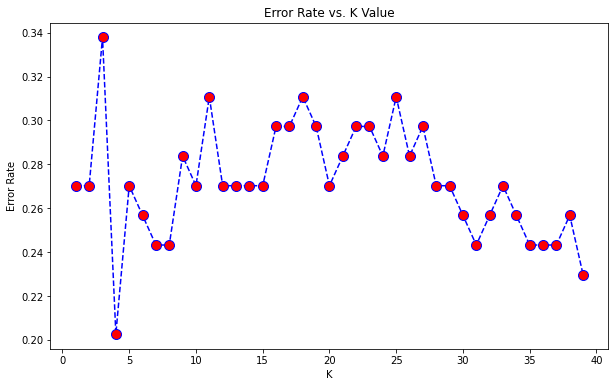

In [51]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.7972972972972973 at K = 3


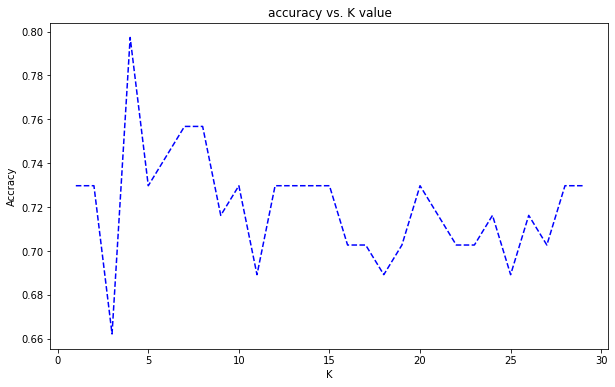

In [52]:
acc = []
#Will take some time
from sklearn import metrics
for i in range(1,30):
  neigh= KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
  yhat = neigh.predict(X_test)
  acc.append(metrics.accuracy_score(y_test,yhat))
plt.figure(figsize=(10,6))
plt.plot(range(1,30),acc,color='blue',linestyle='dashed')
plt.title('accuracy vs. K value')
plt.xlabel('K')
plt.ylabel('Accracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Conclusion

The study resulted into the following accuracy scores.

1. 80- 20 - Recorded Model Accuracy Score is 0.68
2. 70- 30 - Recorded Model Accuracy Score is 0.71
3. 60- 40 - Recorded Model Accuracy Score is 0.70

As observed, the best model was the one splitted into 70- 30.
After performing hyperparameter optimization our best k value was observed to be 3 which resulted to an accuracy of 0.8243243243243243
